# Project: Credit Card Fraud Detection Model

## Problem Statement

 * In 2018, the amount of money involved in fraudulent transactions was over 9  billion dollars in the US alone
 
 * About 0.1% of the total transactions are fraudulent, which requires sampling to be done for creating an effective model
 
 * The data contains information about credit card transactions about people which is anonymysed with labels 0 (genuine) or 1 (fraudulent).
 
 * In this project, traditional machine learning algorithms such as Random Forest and Deep Learning techniques (TensorFlow, Keras) will be utilized for developing a supervized model to predict if a transaction is fraudulent or not.
 

## Step 1) Importing necessary packages and the dataset

In [42]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
import itertools
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

#to replicate results later
np.random.seed(2)

In [2]:
data=pd.read_csv('creditcard.csv')

In [3]:
#the dataset has over 250k records and 31 columns
data.shape

(284807, 31)

In [4]:
#exploring the head of the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#exploring the tail of the data
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Step 2) Data Preprocessing

In [6]:
#scaling the amount column and dropping the orignal column
data['normalized_amount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data=data.drop(columns=['Amount'])

In [7]:
#dropping the 'Time' column
data=data.drop(columns=['Time'],axis=1)

In [8]:
#Seperating the data into X (independent) and y (dependent variable)
X=data.iloc[:,data.columns != 'Class']
y=data.iloc[:,data.columns == 'Class']

In [9]:
#splitting the data
X_train, X_test, y_train, y_test=train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=0)

In [10]:
#exploring the shape of the training dataset
X_train.shape

(199364, 29)

In [11]:
#exploring the shape of the testing dataset
X_test.shape

(85443, 29)

In [12]:
#transform the data into numpy arrays
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

## Step 3) Model Building
-----
## Deep Neural Network

In [13]:
model=Sequential([
        Dense(units=16,input_dim=29,activation='relu'), #inpit_dim=no of columns in training set
        Dense(units=24,activation='relu'),
        Dropout(0.5),
        Dense(units=20,activation='relu'),
        Dense(units=24,activation='relu'),
        Dense(1,activation='sigmoid'), # single output node (1)
])


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

### Training the model

In [15]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
13291/13291 [==============================] - 9s 635us/step - loss: 0.0218 - accuracy: 0.9975
Epoch 2/5
13291/13291 [==============================] - 8s 625us/step - loss: 0.0041 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 8s 597us/step - loss: 0.0045 - accuracy: 0.9993
Epoch 4/5
13291/13291 [==============================] - 8s 586us/step - loss: 0.0032 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 8s 593us/step - loss: 0.0031 - accuracy: 0.9994


In [16]:
score=model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 1s 393us/step - loss: 0.0036 - accuracy: 0.9994
[0.0036122656892985106, 0.9993562698364258]


* We achieved 99.94% accuracy in the dataset.

* Since most of the transactions are not fraudulent, accuracy is not the best measure to evaluate the model.

* We will use other metrics to evaluate the performance of the model.

* Precision, Specificity, Recall etc are some of the important measures here.

* Our goal is to improve the recall score as high as the accuracy score. A high recall will signify a useful model.


### Confusion Matrix

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [18]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

In [19]:
cnf_matrix=confusion_matrix(y_test,y_pred.round())

Confusion matrix, without normalization
[[85274    22]
 [   33   114]]


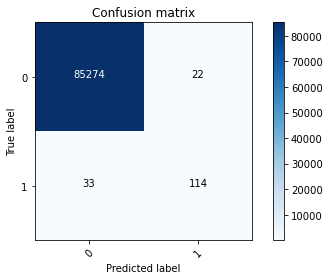

In [20]:
plot_confusion_matrix(cnf_matrix, classes= (0,1),
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

**31 fraudulent transactions were marked as non fraudulent.**

### Plotting the confusion matrix using the whole data

Confusion matrix, without normalization
[[284246     69]
 [   103    389]]


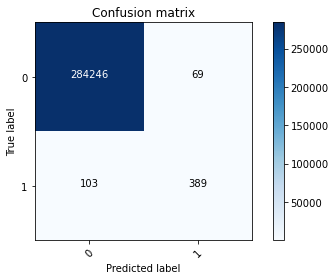

In [21]:
y_pred=model.predict(X)
y_expected=pd.DataFrame(y)

cnf_matrix=confusion_matrix(y_expected,y_pred.round())

plot_confusion_matrix(cnf_matrix, classes= (0,1),
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

**Around 100 fraudulent transactions were labelled as genuine.**

## Random Forest

In [22]:
X=data.iloc[:,data.columns != 'Class']
y=data.iloc[:,data.columns == 'Class']

X_train, X_test, y_train, y_test=train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=0)

In [23]:
randomforest=RandomForestClassifier(n_estimators=100)

In [24]:
randomforest.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [25]:
y_pred=randomforest.predict(X_test)

In [26]:
cnf_matrix=confusion_matrix(y_test,y_pred.round())

Confusion matrix, without normalization
[[85290     6]
 [   33   114]]


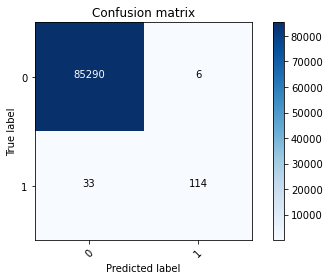

In [27]:
plot_confusion_matrix(cnf_matrix, classes= (0,1),
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

#### Using the whole dataset

In [28]:
y_pred2=randomforest.predict(X)

In [29]:
cnf_matrix2=confusion_matrix(y,y_pred2.round())

Confusion matrix, without normalization
[[284309      6]
 [    34    458]]


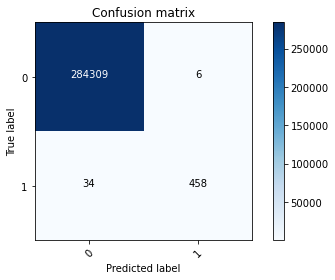

In [30]:
plot_confusion_matrix(cnf_matrix2, classes= (0,1),
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

**Only 34 fraudulent instances in the whole dataset are wrongly classified as genuine**

## Decision Trees

In [31]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [32]:
y_pred=decision_tree.predict(X_test)

#### Confusion matrix

Confusion matrix, without normalization
[[85267    29]
 [   36   111]]


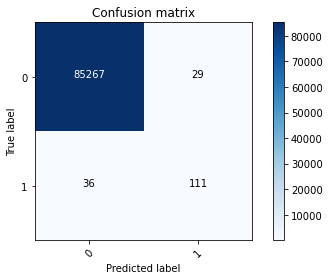

In [33]:
cnf_matrix2=confusion_matrix(y_test,y_pred.round())

plot_confusion_matrix(cnf_matrix2, classes= (0,1),
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

#### Using the whole dataset

Confusion matrix, without normalization
[[284286     29]
 [    36    456]]


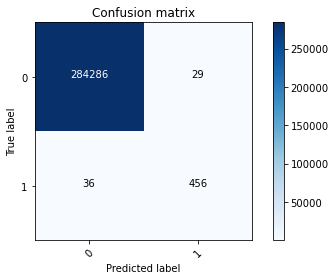

In [34]:
y_pred2=decision_tree.predict(X)

cnf_matrix2=confusion_matrix(y,y_pred2.round())

plot_confusion_matrix(cnf_matrix2, classes= (0,1),
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

**37 fraudulent transactions were incorrectly labelled**

-----
### Undersampling the data & running a deep neural network on the data

In [35]:
#extracting the indices of the fraudulent transactions
fraud_indices=np.array(data[data.Class==1].index)
number_fraud_records=len(fraud_indices)

#extracting the indices of the normal transactions
normal_indices=np.array(data[data.Class==0].index)
normal_records=len(normal_indices)

#randomly selecting a subset of normal indices matching the length of fraud_indices (undersampling)
random_normal_records=np.random.choice(normal_indices, number_fraud_records, replace=False)
random_normal_records=np.array(random_normal_records)

#merging the undersampled normal indices with the fraud indices
under_sample_indices=np.concatenate([fraud_indices, random_normal_records])

#after selecting the indices for the undersampled data, we will subset the data matching these indexes.
under_sample_data=data.iloc[under_sample_indices,:]

#Dividing the undersampled data into X, y

under_sample_X=under_sample_data.iloc[:,under_sample_data.columns != 'Class']
under_sample_y=under_sample_data.iloc[:,under_sample_data.columns == 'Class']

#splitting the data
X_train, X_test, y_train, y_test=train_test_split(under_sample_X,
                                                  under_sample_y,
                                                 test_size=0.3,
                                                 random_state=0)

#transform the data into numpy arrays
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [36]:
#we will use the same deep neural network defined earlier in the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [37]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
46/46 [==============================] - 0s 796us/step - loss: 0.6069 - accuracy: 0.8948
Epoch 2/5
46/46 [==============================] - 0s 790us/step - loss: 0.2158 - accuracy: 0.9194
Epoch 3/5
46/46 [==============================] - 0s 715us/step - loss: 0.1686 - accuracy: 0.9315
Epoch 4/5
46/46 [==============================] - 0s 668us/step - loss: 0.1307 - accuracy: 0.9515
Epoch 5/5
46/46 [==============================] - 0s 683us/step - loss: 0.1454 - accuracy: 0.9359


Confusion matrix, without normalization
[[149   0]
 [ 23 124]]


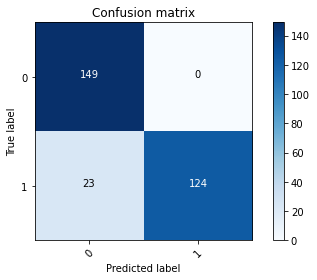

In [38]:
#predicting results and plotting the confusion matrix

y_pred=model.predict(X_test)
y_expected=pd.DataFrame(y_test)

cnf_matrix=confusion_matrix(y_expected,y_pred.round())

plot_confusion_matrix(cnf_matrix, classes= (0,1),
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

#### Plotting the confusion matrix for the whole data

Confusion matrix, without normalization
[[284145    170]
 [    68    424]]


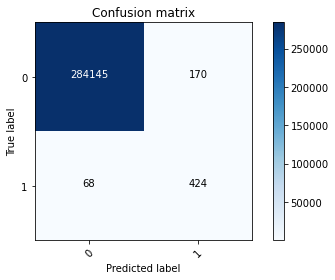

In [39]:
y_pred=model.predict(X)
y_expected=pd.DataFrame(y)

cnf_matrix=confusion_matrix(y_expected,y_pred.round())

plot_confusion_matrix(cnf_matrix, classes= (0,1),
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

**There are still many misclassified predictions.**

-----
### Oversampling

In [45]:
X_resample,y_resample=SMOTE().fit_resample(X,y.values.ravel())

Epoch 1/5
26537/26537 [==============================] - 17s 636us/step - loss: 0.0525 - accuracy: 0.9795
Epoch 2/5
26537/26537 [==============================] - 16s 617us/step - loss: 0.0129 - accuracy: 0.9968
Epoch 3/5
26537/26537 [==============================] - 16s 614us/step - loss: 0.0098 - accuracy: 0.9976
Epoch 4/5
26537/26537 [==============================] - 17s 628us/step - loss: 0.0087 - accuracy: 0.9980
Epoch 5/5
26537/26537 [==============================] - 16s 605us/step - loss: 0.0079 - accuracy: 0.9983
Confusion matrix, without normalization
[[84926   246]
 [   11 85406]]


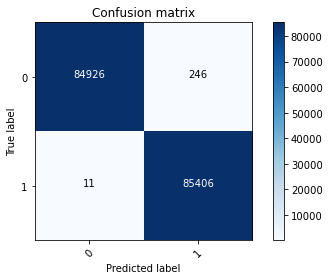

In [46]:
y_resample=pd.DataFrame(y_resample)
X_resample=pd.DataFrame(X_resample)

#splitting the data
X_train, X_test, y_train, y_test=train_test_split(X_resample,
                                                  y_resample,
                                                 test_size=0.3,
                                                 random_state=0)
#transform the data into numpy arrays
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

#training the neural network model
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

#predicting results and plotting the confusion matrix

y_pred=model.predict(X_test)
y_expected=pd.DataFrame(y_test)

cnf_matrix=confusion_matrix(y_expected,y_pred.round())

plot_confusion_matrix(cnf_matrix, classes= (0,1),
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

#### Plotting the confusion matrix for the whole data

Confusion matrix, without normalization
[[283585    730]
 [     0    492]]


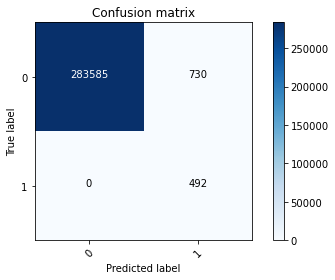

In [47]:
y_pred=model.predict(X)
y_expected=pd.DataFrame(y)

cnf_matrix=confusion_matrix(y_expected,y_pred.round())

plot_confusion_matrix(cnf_matrix, classes= (0,1),
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

**Note: No fraudulent transactions were labelled as normal after oversampling**

## Conclusion:

* The data involved real time transaction data which was anonymyzed.

* The data was highly imbalanced which created a challenge for the classifiers to learn the data accurately.

* Random Forest, Decision Trees, and Deep Learning were utilized in this notebook.

* Confusion matrix was plotted for every model since accuracy is not the sole measure to evaluate model performance.

* Best results was obtained by applying SMOTE (oversampling) on a Deep Learning Model with almost no false positives detected by the model.